# Introduction to GeoPandas for Working with Geospatial Vector Data (i.e., shapes: points, lines, and polygons)

# I. Importing Necessary Packages

In [1]:
import geopandas as gpd
import shapely

# II. Introduction to GeoPandas Data Structures

GeoPandas extends the Pandas package by adding support for geospatial vector data (i.e., shapes: points, lines, polygons) 

The core data structure in GeoPandas is the *GeoDataFrame*, which is similar to a Pandas DataFrame made up of an index and collection of *Series* (columns) as well as a special column named "geometry". The geometery column is a *GeoSeries* which is a special structure that can handle shapes (or "geometries") like points, lines, and polygons. A GeoDataFrame can contain as many Series and GeoSeries as you want. 

Below is a schematic of what a GeoPandas GeoDataFrame looks like, where the green boxes indicate the index, yellow boxes indicate data (with column names) in Series structures and pink boxes show a single GeoSeries structure which would have the column name "geometry".


<img src="images/geodataframe.svg" alt="schematic of a dataframe" width="700"/> 
         
(Image Source: [GeoPandas Docs Getting Started Tutorial](https://geopandas.org/en/stable/getting_started/introduction.html#Concepts)

# II. Loading a ShapeFile into a GeoDataFrame

Most of the time you'll probably start a geo-analysis with a shapefile or geodatabase, both of which are have multiple components. Three components are mandatory for shapefiles: 
- a main file that contains the feature geometry (.shp),
- an index file that stores the index of the feature geometry (.shx), and
- a dBASE table (.dbf) that stores the attribute information of features.

The shapefiles we'll load contain the boundaries for a few US states and the centerlines for some large rivers. The files we're using contain subsets of data from larger files that are publicly available from the US Census Bureau and Natural Earth data project. If you're interested, the full data files are [cb_2023_us_state_500k.shp from the Census Bureau cartographic boundary files](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html) and [ne_10m_rivers_lake_centerlines.shp, ne_10m_rivers_north_america.shp from the Natural Earth data project](https://www.naturalearthdata.com/downloads/10m-physical-vectors/10m-rivers-lake-centerlines/).

In [20]:
# load state boundaries from shape file
gdf_states = gpd.read_file('data/state_boundaries/MS_LA_AR_AL_TN_cb_2023_us_state_500km.shp')
gdf_states

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131185049346,4582326383,"MULTIPOLYGON (((760323.731 857474.728, 760524...."
1,05,00068085,0400000US05,05,AR,Arkansas,00,134660466558,3122251184,"POLYGON ((122656.347 1495564.869, 122680.321 1..."
2,47,01325873,0400000US47,47,TN,Tennessee,00,106792311478,2322248149,"POLYGON ((514676.039 1342513.625, 514738.015 1..."
3,28,01779790,0400000US28,28,MS,Mississippi,00,121533540877,3914738613,"MULTIPOLYGON (((719751.38 821718.593, 721088.0..."
4,22,01629543,0400000US22,22,LA,Louisiana,00,111930452904,23721187320,"MULTIPOLYGON (((687937.424 779840.415, 688125...."


This is a GeoPandas GeoDataFrame and as you can see, it looks a lot like a Pandas DataFrame. Each row is a data entry for a different state. Notice the rightmost column named "geometry". It contains geospatial shapes that represent the boundaries of each state. 

Let's look at the data type of each column

In [21]:
gdf_states.dtypes

STATEFP       object
STATENS       object
GEOIDFQ       object
GEOID         object
STUSPS        object
NAME          object
LSAD          object
ALAND          int64
AWATER         int64
geometry    geometry
dtype: object

You should remember seeing most of these data types from the Pandas notebook, but GeoPandas adds a new data type "geometry". This is indicating that the column named "geometry" is a GeoSeries that contains geospatial shapes, which we saw in the notebook cells above.

Since there is only one column of type geometry, GeoPandas makes that column the "active geometry column." You can have more than one GeoSeries column that contain shapes, but only one active at a time. 

Notice the values inside the shapes in the geometry column of the GeoDataFrame. What are those numbers? Each set of numbers (separated by commas) is a x,y node (point) in the shape. Large numbers, like we have, usually indicate that the data is in a coordinate reference system that has units of meters (as opposed to degrees latitude and longitude). We'll talk about coordinate reference systems next.

# III. Coordinate Reference Systems (CRS)

Every map has a projection; it's how we take something on a spherical earth and flatten it out. Let's see which projection our data from MARIS uses:

In [3]:
gdf_states.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

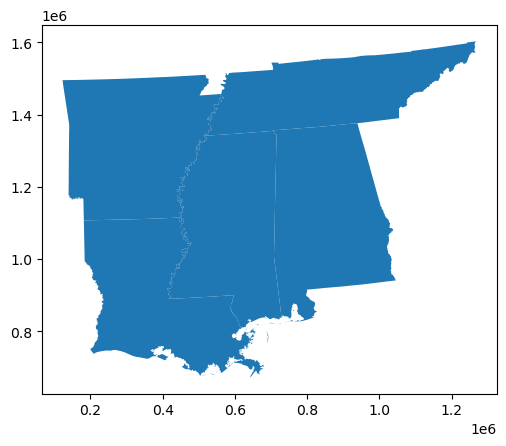

In [6]:
gdf_states.plot()

In [8]:
gdf_rivers = gpd.read_file("data/natural_earth_rivers/ms_clipped_major_rivers/ms_clipped_major_rivers.shp")
gdf_rivers

,scalerank,featurecla,name,rivernum,ne_id,wikidataid,geometry
0,8,River,Bayou Lafourche,916.0,1159128577,Q2892300,"LINESTRING (568357.042 689163.124, 565180.878 ..."
1,7,River,Pearl,528.0,1159122089,Q1739672,"MULTILINESTRING ((635175.29 1145225.449, 63724..."
2,6,River,Alabama,251.0,1159114979,Q558643,"MULTILINESTRING ((799076.718 1018795.098, 7983..."
3,8,River,Tombigbee,710.0,1159126229,Q2297877,"LINESTRING (700410.717 1322268.779, 702668.212..."
4,7,River,Red,414.0,1159119701,Q156032,"LINESTRING (331751.24 925190.299, 332215.567 9..."
...,...,...,...,...,...,...,...
70,10,River,St. Francis,23283.0,1159108133,Q1108022,"LINESTRING (499575.978 1397371.49, 499957.074 ..."
71,11,River,Hatchie,22539.0,1159139009,Q5681137,"LINESTRING (613963.025 1404839.47, 614746.904 ..."
72,12,River,Little Red,NaN,1746333499,Q6651505,"LINESTRING (364723.209 1390543.547, 363354.685..."
73,11,River,Cache,22542.0,1159139021,Q5015966,"LINESTRING (438432.924 1394010.936, 438485.073..."


In [9]:
gdf_rivers.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

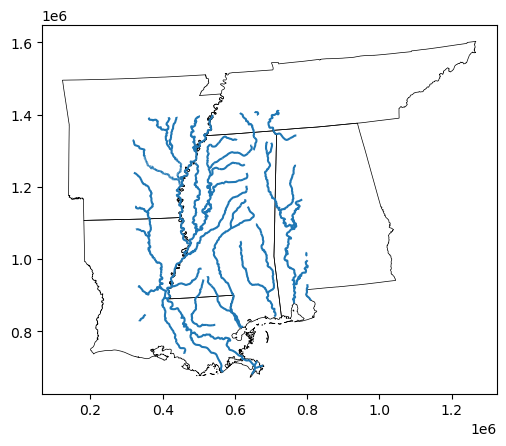

In [11]:
ax = gdf_states.plot(facecolor='none',edgecolor='black',lw=0.5)
gdf_rivers.plot(ax=ax)

In [13]:
sites=gpd.read_file('data/EPA_superfund_boundaries/MS_EPA_NPL_Site_Boundaries.gdb')
sites

,EPA_PROGRAM,EPA_ID,SITE_NAME,GIS_AREA,GIS_AREA_UNITS,URL_ALIAS_TXT,NPL_STATUS_CODE,CITY_NAME,COUNTY,STATE_CODE,ZIP_CODE,geometry
0,Superfund Remedial,MSD056029648,POTTER CO.,0.012505,Square Miles,https://www.epa.gov/superfund/Potter,R,WESSON,COPIAH,MS,39191,"MULTIPOLYGON (((-90.39347 31.71068, -90.39161 ..."
1,Superfund Remedial,MSD980601736,WALCOTTE CHEMICAL CO. WAREHOUSES,0.001875,Square Miles,https://www.epa.gov/superfund/walcotte-chemica...,D,GREENVILLE,WASHINGTON,MS,38701,"MULTIPOLYGON (((-91.05367 33.41172, -91.05336 ..."
2,Superfund Remedial,MSD980840045,"NEWSOM BROTHERS/OLD REICHHOLD CHEMICALS, INC.",0.106864,Square Miles,https://www.epa.gov/superfund/newsom-brothers,D,COLUMBIA,MARION,MS,39429,"MULTIPOLYGON (((-89.83172 31.24718, -89.82803 ..."
3,Superfund Remedial,MSD008154486,"CHEMFAX, INC.",0.030808,Square Miles,https://www.epa.gov/superfund/chemfax,F,GULFPORT,HARRISON,MS,39505,"MULTIPOLYGON (((-89.09194 30.4285, -89.08924 3..."
4,Superfund Remedial,MSD000828558,SOUTHEASTERN WOOD PRESERVING,0.052808,Square Miles,https://www.epa.gov/superfund/southeastern-woo...,F,CANTON,MADISON,MS,39046,"MULTIPOLYGON (((-90.01943 32.61852, -90.01559 ..."
5,Superfund Remedial,MSD000272385,RED PANTHER CHEMICAL COMPANY,0.013329,Square Miles,https://www.epa.gov/superfund/red-panther-chem...,D,CLARKSDALE,COAHOMA,MS,38614,"MULTIPOLYGON (((-90.56292 34.18858, -90.56229 ..."
6,Superfund Remedial,MSD990866329,KERR-MCGEE CHEMICAL CORP - COLUMBUS,0.101956,Square Miles,https://www.epa.gov/superfund/kerr-mcgee-chemi...,F,COLUMBUS,LOWNDES,MS,39701,"MULTIPOLYGON (((-88.41026 33.51039, -88.40898 ..."
7,Superfund Remedial,MSD004006995,AMERICAN CREOSOTE WORKS INC (LOUISVILLE),0.227193,Square Miles,https://www.epa.gov/superfund/american-creosot...,F,LOUISVILLE,WINSTON,MS,39339,"MULTIPOLYGON (((-89.06084 33.11378, -89.06047 ..."
8,Superfund Remedial,MSD046497012,DAVIS TIMBER COMPANY,0.040010,Square Miles,https://www.epa.gov/superfund/davis-timber,D,HATTIESBURG,LAMAR,MS,39401,"MULTIPOLYGON (((-89.40309 31.34649, -89.39912 ..."
9,Superfund Remedial,MSD980710941,FLOWOOD SITE,0.076644,Square Miles,https://www.epa.gov/superfund/flowood,D,FLOWOOD,RANKIN,MS,39208,"MULTIPOLYGON (((-90.1449 32.30375, -90.14488 3..."


In [14]:
sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
sites.to_crs('epsg:5070',inplace=True)

<Axes: >

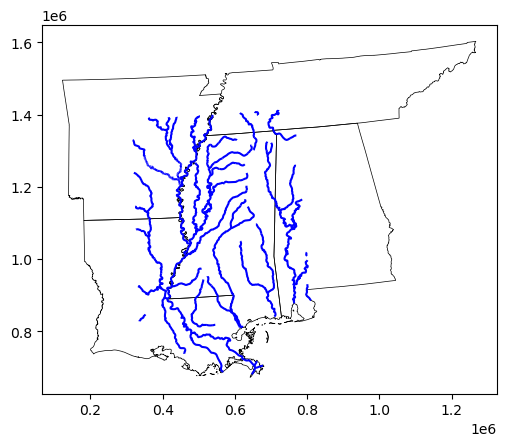

In [16]:
ax = gdf_states.plot(facecolor='none',edgecolor='black',lw=0.5)
gdf_rivers.plot(ax=ax,color='blue')
sites.plot(ax=ax,color='orange')

What happened, why can't we see the orange sites? If we were using a fancier package for plotting we could zoom in and see them, but with this simple static plotting the sites are too small to see at this scale.  Let's find the polygon centroids and plot the points on this map instead.

In [17]:
# create centroid points in the geometry column
sites['centroid']=sites.geometry.centroid
sites

,EPA_PROGRAM,EPA_ID,SITE_NAME,GIS_AREA,GIS_AREA_UNITS,URL_ALIAS_TXT,NPL_STATUS_CODE,CITY_NAME,COUNTY,STATE_CODE,ZIP_CODE,geometry,centroid
0,Superfund Remedial,MSD056029648,POTTER CO.,0.012505,Square Miles,https://www.epa.gov/superfund/Potter,R,WESSON,COPIAH,MS,39191,"MULTIPOLYGON (((528846.456 975159.623, 529024....",POINT (528900.434 975036.499)
1,Superfund Remedial,MSD980601736,WALCOTTE CHEMICAL CO. WAREHOUSES,0.001875,Square Miles,https://www.epa.gov/superfund/walcotte-chemica...,D,GREENVILLE,WASHINGTON,MS,38701,"MULTIPOLYGON (((456762.356 1161146.457, 456792...",POINT (456738.236 1161074.926)
2,Superfund Remedial,MSD980840045,"NEWSOM BROTHERS/OLD REICHHOLD CHEMICALS, INC.",0.106864,Square Miles,https://www.epa.gov/superfund/newsom-brothers,D,COLUMBIA,MARION,MS,39429,"MULTIPOLYGON (((585109.787 926957.316, 585458....",POINT (585592.82 926721.66)
3,Superfund Remedial,MSD008154486,"CHEMFAX, INC.",0.030808,Square Miles,https://www.epa.gov/superfund/chemfax,F,GULFPORT,HARRISON,MS,39505,"MULTIPOLYGON (((661776.408 841012.053, 662011....",POINT (662013.455 841156.905)
4,Superfund Remedial,MSD000828558,SOUTHEASTERN WOOD PRESERVING,0.052808,Square Miles,https://www.epa.gov/superfund/southeastern-woo...,F,CANTON,MADISON,MS,39046,"MULTIPOLYGON (((557719.87 1078287.363, 558078....",POINT (557961.9 1078231.921)
5,Superfund Remedial,MSD000272385,RED PANTHER CHEMICAL COMPANY,0.013329,Square Miles,https://www.epa.gov/superfund/red-panther-chem...,D,CLARKSDALE,COAHOMA,MS,38614,"MULTIPOLYGON (((497070.009 1250277.929, 497129...",POINT (497157.767 1250143.565)
6,Superfund Remedial,MSD990866329,KERR-MCGEE CHEMICAL CORP - COLUMBUS,0.101956,Square Miles,https://www.epa.gov/superfund/kerr-mcgee-chemi...,F,COLUMBUS,LOWNDES,MS,39701,"MULTIPOLYGON (((699556.86 1188225.895, 699674....",POINT (700002.706 1188255.288)
7,Superfund Remedial,MSD004006995,AMERICAN CREOSOTE WORKS INC (LOUISVILLE),0.227193,Square Miles,https://www.epa.gov/superfund/american-creosot...,F,LOUISVILLE,WINSTON,MS,39339,"MULTIPOLYGON (((642934.455 1139477.198, 642968...",POINT (643097.268 1138951.508)
8,Superfund Remedial,MSD046497012,DAVIS TIMBER COMPANY,0.040010,Square Miles,https://www.epa.gov/superfund/davis-timber,D,HATTIESBURG,LAMAR,MS,39401,"MULTIPOLYGON (((624938.893 940712.324, 625314....",POINT (625126.479 940583.052)
9,Superfund Remedial,MSD980710941,FLOWOOD SITE,0.076644,Square Miles,https://www.epa.gov/superfund/flowood,D,FLOWOOD,RANKIN,MS,39208,"MULTIPOLYGON (((548194.945 1042527.015, 548203...",POINT (548240.763 1042210.438)


Note, we can have more than one column that is a GeoSeries. If we print the data types of all the columns we should see that we have two GeoSeries now. 

In [18]:
# check out the data types
sites.dtypes

EPA_PROGRAM          object
EPA_ID               object
SITE_NAME            object
GIS_AREA            float64
GIS_AREA_UNITS       object
URL_ALIAS_TXT        object
NPL_STATUS_CODE      object
CITY_NAME            object
COUNTY               object
STATE_CODE           object
ZIP_CODE             object
geometry           geometry
centroid           geometry
dtype: object

The default behavior when plotting a GeoSeries in a GeoDataFrame is to plot whatever shapes are in the column named geometry. If you want to plot a different GeoSeries, you have to specify the column name like we do below with ```sites.centroid.plot()```

<Axes: >

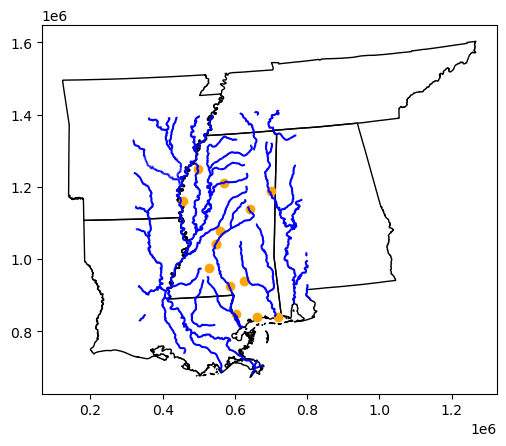

In [19]:
ax = gdf_states.plot(facecolor='none',edgecolor='black')
gdf_rivers.plot(ax=ax,color='blue')
sites.centroid.plot(ax=ax,color='orange')

In [ ]:
import openpyxl
import pandas as pd

In [ ]:
df_toxic = pd.read_csv('data/epa_brownfields_ms/STATE_SINGLE_MS.csv')
df_toxic

In [ ]:
df_toxic.dropna(subset=['LATITUDE83','LONGITUDE83'],inplace=True)
df_toxic

In [ ]:
df_toxic.columns

In [ ]:
df_toxic.dropna(subset=['HDATUM_DESC'],inplace=True)
df_toxic

In [ ]:
df_toxic.HDATUM_DESC.unique()

In [ ]:
df_toxic.SITE_TYPE_NAME.unique()

In [ ]:
df_toxic.INTEREST_TYPES.unique()

In [ ]:
df_toxic.INTEREST_TYPES.dtype

In [ ]:
df_toxic.INTEREST_TYPES.fillna('',inplace=True)

In [ ]:
df_toxic[df_toxic.INTEREST_TYPES.isin(['TRI REPORTER','TSCA SUBMITTER'])]
# df_toxic.query("INTEREST_TYPES.str.contains('TRI')")

In [ ]:
df_toxic.drop(columns=['LOCATION_ADDRESS', 'SUPPLEMENTAL_LOCATION', 'CITY_NAME','FIPS_CODE', 'STATE_CODE',
                       'COUNTRY_NAME','EPA_REGION_CODE','CREATE_DATE', 'UPDATE_DATE', 'US_MEXICO_BORDER_IND',
                       'CONVEYOR','COLLECT_DESC', 'ACCURACY_VALUE','SOURCE_DESC','PGM_SYS_ACRNMS',
                       'NAICS_CODES', 'NAICS_CODE_DESCRIPTIONS','SIC_CODES','SIC_CODE_DESCRIPTIONS',
                       'FEDERAL_FACILITY_CODE', 'FEDERAL_AGENCY_NAME', 'TRIBAL_LAND_CODE','TRIBAL_LAND_NAME',
                       'LOCATION_DESCRIPTION'],inplace=True)
df_toxic

In [ ]:
df_toxic = df_toxic[df_toxic.INTEREST_TYPES.isin(['TRI REPORTER','TSCA SUBMITTER'])]
df_toxic

In [ ]:
# import fiona
# layers=fiona.listlayers("data/acres_frs/ACRES_FRS.kml")
# layers

In [ ]:
# gdf_toxic = gpd.read_file("data/acres_frs/ACRES_FRS.kml", driver="KML")
# gdf_toxic

In [ ]:
study_area = gdf_states.geometry.union_all()
study_area

In [ ]:
gdf_rivers_ms = gpd.clip(gdf_rivers,ms)
gdf_rivers_ms

In [ ]:
# gdf_ms = gpd.read_file("data/tl_2016_28_cousub/tl_2016_28_cousub.shp")
# gdf_ms.head()

In [ ]:
gdf_ms.plot()

In [ ]:
gdf_ms.crs

In [ ]:
gdf_ms = gdf_ms.to_crs('epsg:5070')
gdf_ms.crs

In [ ]:
ms = gdf_ms.geometry.union_all()
ms

In [ ]:
gdf_rivers = gdf_rivers.to_crs('epsg:5070')
gdf_rivers.crs

In [ ]:
gdf_rivers_ms = gpd.clip(gdf_rivers,ms)
gdf_rivers_ms

In [ ]:
gdf_rivers_ms.plot()